## Energy Efficiency Data

The goal of this project is to study the energy efficiency dataset. The dataset has been obtained from the UCI Machine Learning repository

In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd

## Data

The dataset consists of the following features:

- X1 : Relative compactness
- X2 : Surface Area
- X3 : Wall Area
- X4 : Roof Area
- X5 : Overall Height
- X6 : Orientation
- X7 : Glazing Area
- X8 : Glazing Area Distribution
- y1 : Heating Load
- y2 : Cooling Load

### Inspecting the first few rows of the data

In [3]:
#read the data in a dataframe
energyData = pd.read_excel('ENB2012_data.xlsx')
energyData.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Inspecting the properties of the data

In [4]:
energyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


As can bee seen from the above output, the dataset contains non-null values of type float and integer. Furthermore, all the attributes are numerical.

In [5]:
energyData.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Create a histogram of all the attributes

Inspecting the distribution of different attributes

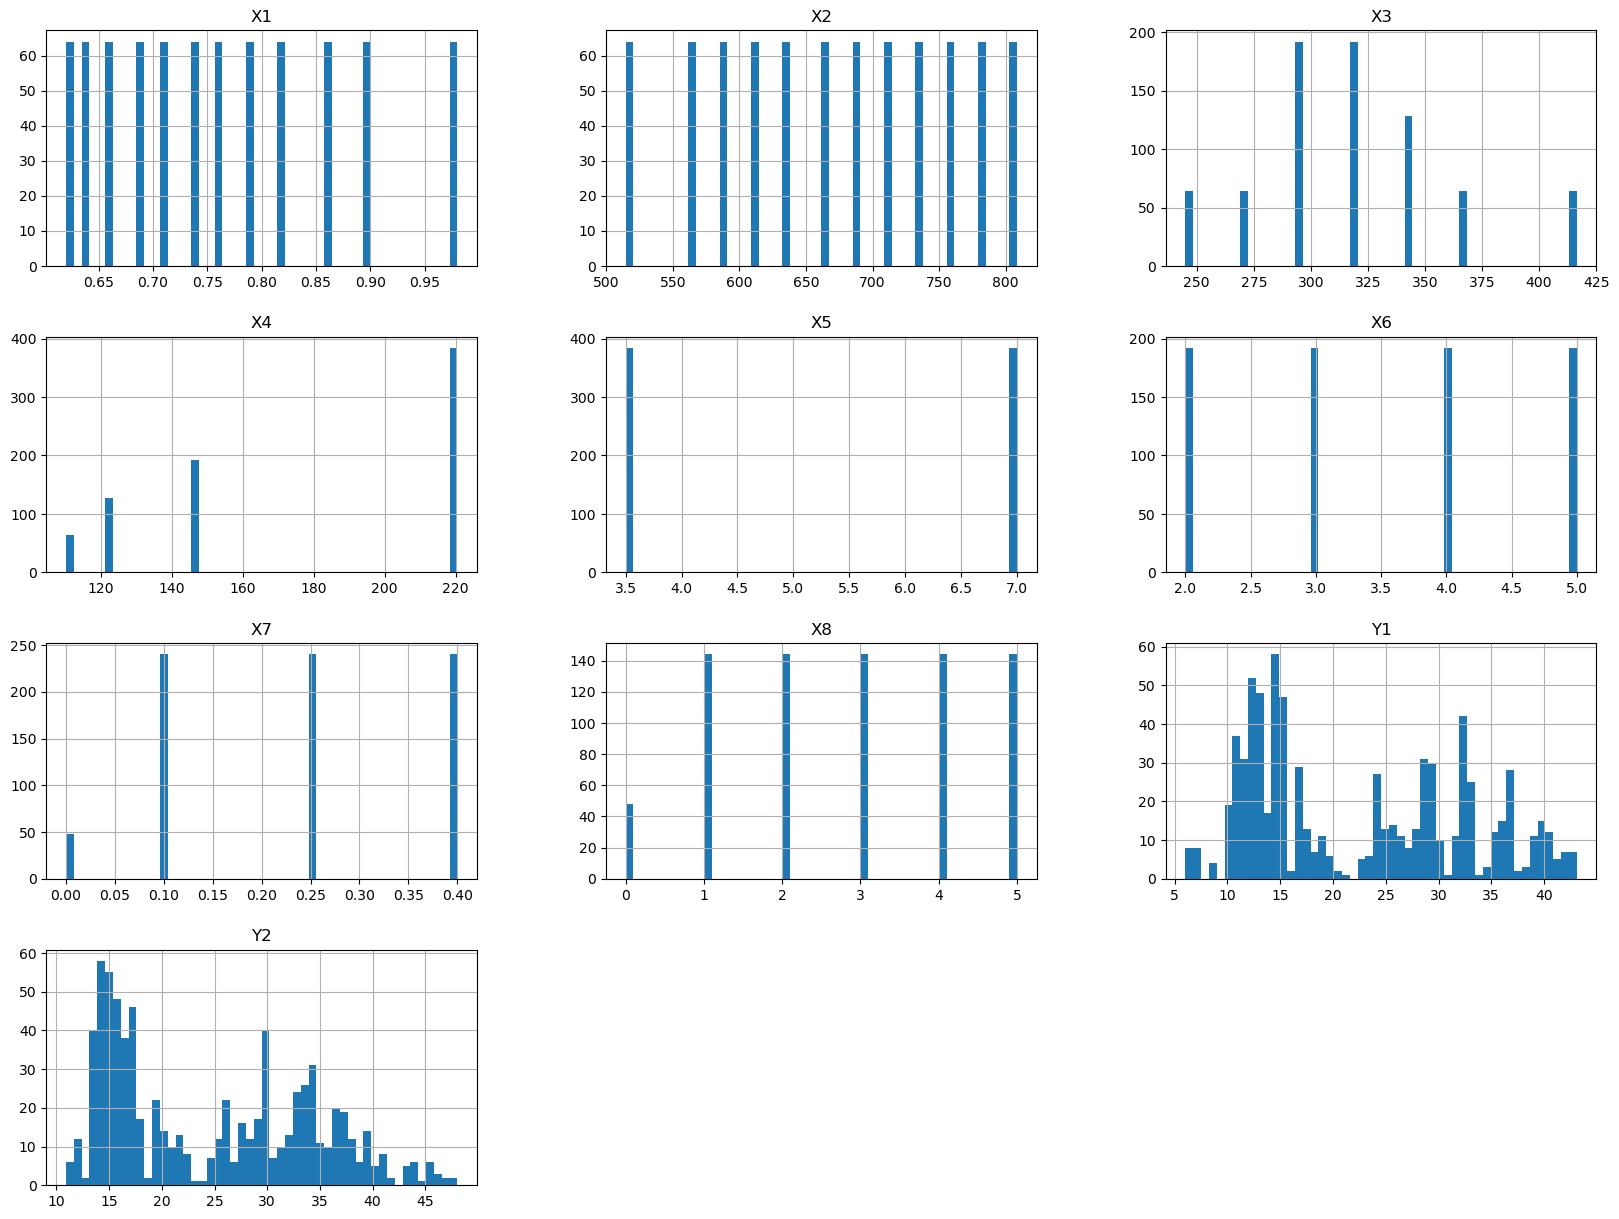

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

energyData.hist(bins=50, figsize=(20,15))
plt.show()

### Some Observations

1. All the input attributes (X1, X2, ... ,X8) are made up of discrete values
2. The attributes X6 (Orientation) and X8 (Glazing area distribution) appear to have distinct categories.
3. The target variables Y1 and Y2 (heating and cooling load, respectively) are *tail heavy*. They will have to be transformed so they have Gaussian distribution

### Creating a test set and setting it aside

The test set should be kept separate from the training set, so only the final model can be applied to the test set.

In [7]:
#Now we can do stratified sampling based on the Glazing Area
#Using scikit-learn's StratifiedShuffleSplit class

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(energyData, energyData["X8"]):
    strat_train_set = energyData.loc[train_index]
    strat_test_set = energyData.loc[test_index]

### Exploratory Data Analysis

We will now perform exploratory data analysis on the training set and try to discern more insights from the data

In [8]:
energyData = strat_train_set.copy()

In [10]:
# Looking at the correlations
corr_matrix = energyData.corr()
corr_matrix["Y1"].sort_values(ascending=False)

Y1    1.000000
Y2    0.975985
X5    0.890746
X1    0.617693
X3    0.478419
X7    0.293797
X8    0.099613
X6    0.014006
X2   -0.652818
X4   -0.866447
Name: Y1, dtype: float64

In [11]:
corr_matrix["Y2"].sort_values(ascending=False)

Y2    1.000000
Y1    0.975985
X5    0.897735
X1    0.630538
X3    0.448044
X7    0.233774
X8    0.064665
X6    0.024122
X2   -0.668695
X4   -0.866602
Name: Y2, dtype: float64

array([[<AxesSubplot: xlabel='X1', ylabel='X1'>,
        <AxesSubplot: xlabel='X2', ylabel='X1'>,
        <AxesSubplot: xlabel='X3', ylabel='X1'>,
        <AxesSubplot: xlabel='X4', ylabel='X1'>,
        <AxesSubplot: xlabel='X5', ylabel='X1'>,
        <AxesSubplot: xlabel='X6', ylabel='X1'>,
        <AxesSubplot: xlabel='X7', ylabel='X1'>,
        <AxesSubplot: xlabel='X8', ylabel='X1'>,
        <AxesSubplot: xlabel='Y1', ylabel='X1'>,
        <AxesSubplot: xlabel='Y2', ylabel='X1'>],
       [<AxesSubplot: xlabel='X1', ylabel='X2'>,
        <AxesSubplot: xlabel='X2', ylabel='X2'>,
        <AxesSubplot: xlabel='X3', ylabel='X2'>,
        <AxesSubplot: xlabel='X4', ylabel='X2'>,
        <AxesSubplot: xlabel='X5', ylabel='X2'>,
        <AxesSubplot: xlabel='X6', ylabel='X2'>,
        <AxesSubplot: xlabel='X7', ylabel='X2'>,
        <AxesSubplot: xlabel='X8', ylabel='X2'>,
        <AxesSubplot: xlabel='Y1', ylabel='X2'>,
        <AxesSubplot: xlabel='Y2', ylabel='X2'>],
       [<AxesSubpl

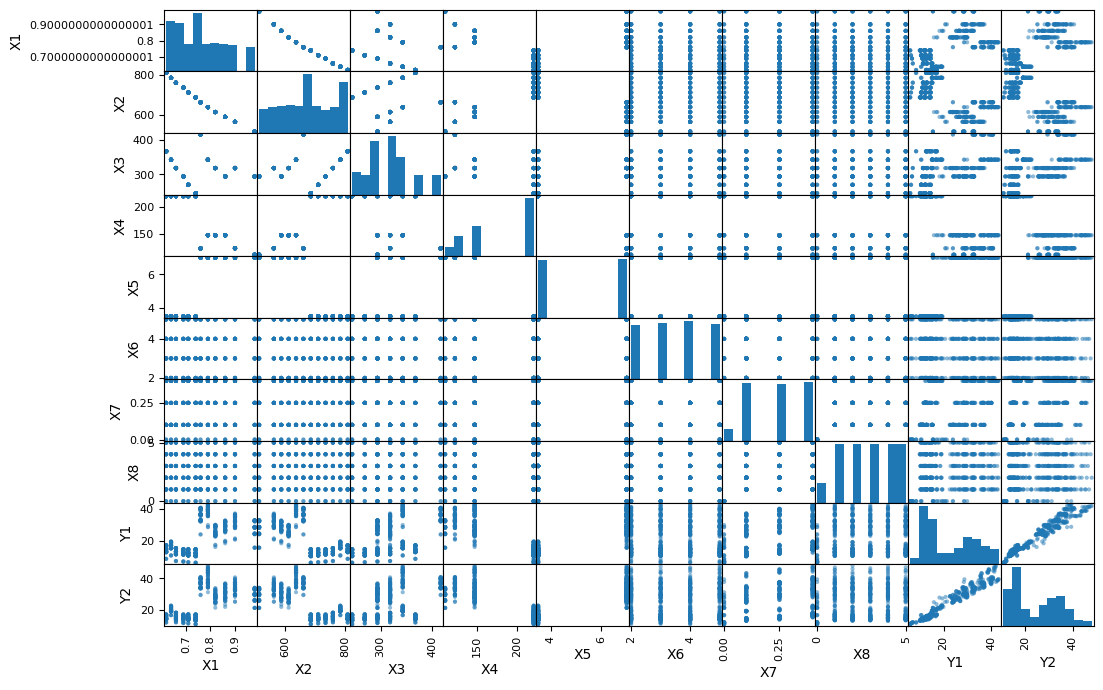

In [12]:
#Using scatter matrix to check for correlations
from pandas.plotting import scatter_matrix

scatter_matrix(energyData, figsize=(12, 8))